In [1]:
#Kenny Daniels
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data=pd.merge(ride_data,city_data,on="city")
# Display the data table for preview
merged_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [51]:
# Obtain the x and y coordinates for each of the three city types
#creating a new dataframe for each type
rural_pd=merged_data.loc[merged_data["type"]=="Rural"]
suburban_pd=merged_data.loc[merged_data["type"]=="Suburban"]
urban_pd=merged_data.loc[merged_data["type"]=="Urban"]

rural_ride_per_city={}
#creating a list of each unique city name
rural_unique=rural_pd["city"].unique()
#creating an entry in a dictionary for each city, and setting the value to 0
for x in range(len(rural_unique)):
    rural_ride_per_city[rural_unique[x]]=0
for x in range(len(rural_pd)):
    #updating the value of each city by one when it encounters that city
    rural_ride_per_city[rural_pd["city"].iloc[x]]=rural_ride_per_city[rural_pd["city"].iloc[x]]+1

rural_ride_fees={}
for x in range(len(rural_unique)):
    #setting the value of each city to 0 in a dictionary
    rural_ride_fees[rural_unique[x]]=0
for x in range(len(rural_pd)):
    #adding in the fare column for each city to the total value
    rural_ride_fees[rural_pd["city"].iloc[x]]=rural_ride_fees[rural_pd["city"].iloc[x]]+rural_pd["fare"].iloc[x]
copy_of_rural_fees=rural_ride_fees.copy() #added this for an easier time using pie chart, just copies the total before its averaged
for x in range(len(rural_unique)):
    #dividing by the number of rides per city to get the average
    rural_ride_fees[rural_unique[x]]=round(rural_ride_fees[rural_unique[x]]/rural_ride_per_city[rural_unique[x]],2)
    
#creating a dictionary for the number of drivers in each city
rural_drivers={}
for x in range(len(rural_unique)):
    rural_drivers[rural_unique[x]]=0
for x in range(len(rural_pd)):
    rural_drivers[rural_pd["city"].iloc[x]]=rural_pd["driver_count"].iloc[x]*10 #multiplied by 10 for visibility on the graph
    
    
    
    
    
#same thing but for suburban
suburban_ride_per_city={}
suburban_unique=suburban_pd["city"].unique()
for x in range(len(suburban_unique)):
    suburban_ride_per_city[suburban_unique[x]]=0
for x in range(len(suburban_pd)):
    suburban_ride_per_city[suburban_pd["city"].iloc[x]]=suburban_ride_per_city[suburban_pd["city"].iloc[x]]+1

suburban_ride_fees={}
for x in range(len(suburban_unique)):
    suburban_ride_fees[suburban_unique[x]]=0
for x in range(len(suburban_pd)):
    suburban_ride_fees[suburban_pd["city"].iloc[x]]=suburban_ride_fees[suburban_pd["city"].iloc[x]]+suburban_pd["fare"].iloc[x]
copy_of_suburban_fees=suburban_ride_fees.copy()
for x in range(len(suburban_unique)):
    suburban_ride_fees[suburban_unique[x]]=round(suburban_ride_fees[suburban_unique[x]]/suburban_ride_per_city[suburban_unique[x]],2)

suburban_drivers={}
for x in range(len(suburban_unique)):
    suburban_drivers[suburban_unique[x]]=0
for x in range(len(suburban_pd)):
    suburban_drivers[suburban_pd["city"].iloc[x]]=suburban_pd["driver_count"].iloc[x]*10

    
    
    
    
    
#same thing but for urban
urban_ride_per_city={}
urban_unique=urban_pd["city"].unique()
for x in range(len(urban_unique)):
    urban_ride_per_city[urban_unique[x]]=0
for x in range(len(urban_pd)):
    urban_ride_per_city[urban_pd["city"].iloc[x]]=urban_ride_per_city[urban_pd["city"].iloc[x]]+1

urban_ride_fees={}
for x in range(len(urban_unique)):
    urban_ride_fees[urban_unique[x]]=0
for x in range(len(urban_pd)):
    urban_ride_fees[urban_pd["city"].iloc[x]]=urban_ride_fees[urban_pd["city"].iloc[x]]+urban_pd["fare"].iloc[x]
copy_of_urban_fees=urban_ride_fees.copy()
for x in range(len(urban_unique)):
    urban_ride_fees[urban_unique[x]]=round(urban_ride_fees[urban_unique[x]]/urban_ride_per_city[urban_unique[x]],2)

urban_drivers={}
for x in range(len(urban_unique)):
    urban_drivers[urban_unique[x]]=0
for x in range(len(urban_pd)):
    urban_drivers[urban_pd["city"].iloc[x]]=urban_pd["driver_count"].iloc[x]*10

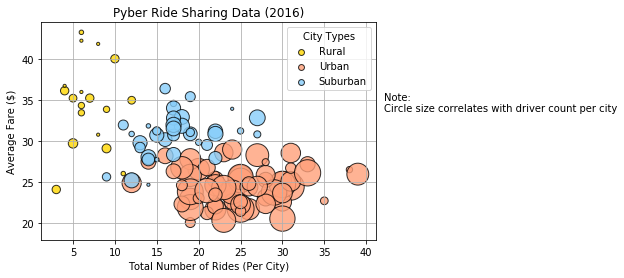

In [3]:

plt.scatter(list(rural_ride_per_city.values()),list(rural_ride_fees.values()),marker="o",
            s=list(rural_drivers.values()),color="gold",alpha=.8,linewidths=1,edgecolors="black")
plt.scatter(list(urban_ride_per_city.values()),list(urban_ride_fees.values()),marker="o",
            s=list(urban_drivers.values()),color="lightsalmon",alpha=.8,linewidths=1,edgecolors="black")
plt.scatter(list(suburban_ride_per_city.values()),list(suburban_ride_fees.values()),marker="o",
            s=list(suburban_drivers.values()),color="lightskyblue",alpha=.8,linewidths=1,edgecolors="black")
# Create a legend
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.figtext(.92,.57,"Note:\nCircle size correlates with driver count per city")
plt.grid()

created_legend = plt.legend(loc="best", labels=["Rural", "Urban", "Suburban"], title="City Types")
for handle in created_legend.legendHandles:
    handle.set_sizes([35.0])

# Save Figure
plt.savefig("./data/Pyber_Ride_Sharing_Data_2016.png")

plt.show()

## Total Fares by City Type

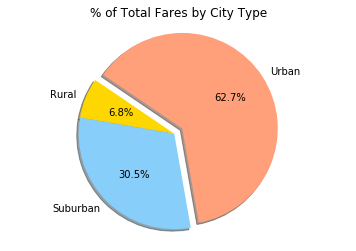

In [66]:
# Calculate Type Percents
#Going through every dictionary value and adding it to a total
Urban_fees=0
for x in range(len(urban_unique)):
    Urban_fees=Urban_fees+copy_of_urban_fees[urban_unique[x]]

Suburban_fees=0
for y in range(len(suburban_unique)):
    Suburban_fees=Suburban_fees+copy_of_suburban_fees[suburban_unique[y]]
    
Rural_fees=0
for z in range(len(rural_unique)):
    Rural_fees=Rural_fees+copy_of_rural_fees[rural_unique[z]]

#Formatting
pieFees=[Urban_fees,Rural_fees, Suburban_fees]
labels=["Urban","Rural", "Suburban"]
explode = (0.1, 0, 0)
colors=["lightsalmon","gold","lightskyblue"]

plt.pie(pieFees, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("./data/%_of_Total_Fares.png")
plt.show()

## Total Rides by City Type

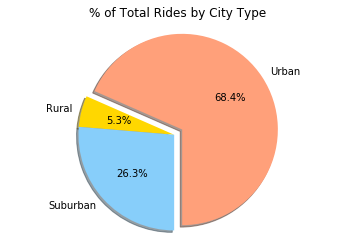

In [64]:
# Calculate Ride Percents
#Going through every dictionary value and adding it to a total
Rural_rider_total=0
for y in range(len(rural_unique)):
    Rural_rider_total=Rural_rider_total+rural_ride_per_city[rural_unique[y]]

Suburban_rider_total=0
for x in range(len(suburban_unique)):
    Suburban_rider_total=Suburban_rider_total+suburban_ride_per_city[suburban_unique[x]]

Urban_rider_total=0
for z in range(len(urban_unique)):
    Urban_rider_total=Urban_rider_total+urban_ride_per_city[urban_unique[z]]

#Formatting
pieList=[Urban_rider_total,Rural_rider_total, Suburban_rider_total]
labels=["Urban","Rural", "Suburban"]
explode = (0.1, 0, 0)
colors=["lightsalmon","gold","lightskyblue"]

plt.pie(pieList, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("./data/%_of_Total_Rides.png")
plt.show()


## Total Drivers by City Type

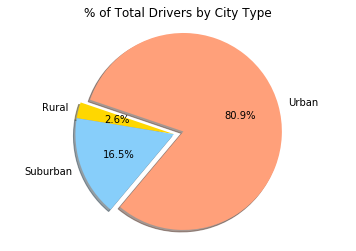

In [65]:
# Calculate Driver Percents
#Going through every dictionary value and adding it to a total
Urban_driver_total=0
for x in range(len(urban_unique)):
    Urban_driver_total=Urban_driver_total+urban_drivers[urban_unique[x]]
    
Suburban_driver_total=0
for y in range(len(suburban_unique)):
    Suburban_driver_total=Suburban_driver_total+suburban_drivers[suburban_unique[y]]

Rural_driver_total=0
for z in range(len(rural_unique)):
    Rural_driver_total=Rural_driver_total+rural_drivers[rural_unique[z]]

#Formatting
PieList=[Urban_driver_total,Rural_driver_total,Suburban_driver_total]
labels=["Urban","Rural", "Suburban"]
explode = (0.1, 0, 0)
colors=["lightsalmon","gold","lightskyblue"]

plt.pie(PieList, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("./data/%_of_Total_Drivers.png")
plt.show()